In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from transformers import pipeline,AutoTokenizer,TFAutoModelForSequenceClassification
from scipy.special import softmax

In [2]:
df=pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
df.shape

(568454, 10)

In [5]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
df.dropna(inplace=True,axis=0)

In [7]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score', ylabel='count'>

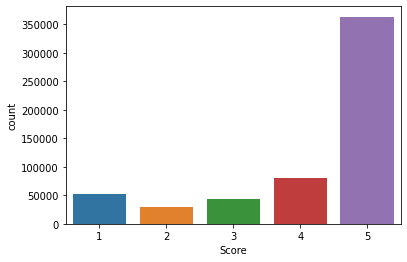

In [8]:
sns.countplot(df.Score)

In [9]:
print('users with over 1 reviews  :',(df['UserId'].value_counts() >  0).sum())
print('users with over 5 reviews  :',(df['UserId'].value_counts() >  5).sum())
print('users with over 10 reviews :',(df['UserId'].value_counts() > 10).sum())
print('users with over 20 reviews :',(df['UserId'].value_counts() > 20).sum())
print('users with over 30 reviews :',(df['UserId'].value_counts() > 30).sum())
print('users with over 50 reviews :',(df['UserId'].value_counts() > 50).sum())

users with over 1 reviews  : 256047
users with over 5 reviews  : 18175
users with over 10 reviews : 6358
users with over 20 reviews : 1702
users with over 30 reviews : 703
users with over 50 reviews : 260


In [26]:
one_score_df=df[df['Score']==1].sample(100)
two_score_df=df[df['Score']==2].sample(100)
three_score_df=df[df['Score']==3].sample(100)
four_score_df=df[df['Score']==4].sample(100)
five_score_df=df[df['Score']==5].sample(100)
df1=pd.concat([one_score_df,two_score_df,three_score_df,four_score_df,five_score_df])

In [27]:
df1.shape

(500, 10)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score', ylabel='count'>

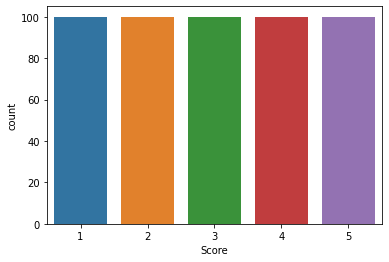

In [28]:
sns.countplot(df1.Score)

In [29]:
df1=df1[['Id', 'Score', 'Time', 'Summary', 'Text']]

In [30]:
df1.head(3)

,Id,Score,Time,Summary,Text
197972,197973,1,1340755200,Good for long toungues or really small faces,Even though this appears to be intended for do...
173894,173895,1,1308355200,Cheaper elsewhere!!,I agree with other reviewers. Much cheaper el...
153130,153131,1,1351036800,Has The Manufacturer Changed the Formula?,I have been giving these chews to my Mini-Pinc...


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 197972 to 53602
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       500 non-null    int64 
 1   Score    500 non-null    int64 
 2   Time     500 non-null    int64 
 3   Summary  500 non-null    object
 4   Text     500 non-null    object
dtypes: int64(3), object(2)
memory usage: 39.6+ KB


# BERT Pretrained Model:

In [32]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [17]:
# MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer=AutoTokenizer.from_pretrained(MODEL)
# model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
example=df1['Summary'].values[0]
example

'Good for long toungues or really small faces'

In [38]:
tokenizer(example)

{'input_ids': [101, 12050, 10139, 11134, 49715, 21792, 10362, 25165, 11871, 31766, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [39]:
classifier(example)[0]

{'label': '3 stars', 'score': 0.48708775639533997}

In [40]:
print(df1['Score'].values[0])

1


In [44]:
dict={}
for Id,Summary in df1[['Id','Summary']].values:
    res=classifier(Summary)
    dict[Id]=res[0]

In [47]:
pred_reviews=pd.DataFrame(dict).T

In [48]:
pred_reviews.head()

,label,score
197973,3 stars,0.487088
173895,2 stars,0.377687
153131,1 star,0.295968
481578,1 star,0.488964
487470,1 star,0.550046


In [49]:
pred_reviews.to_csv('pred_reviews500.csv')

In [50]:
pred_reviews = pred_reviews.reset_index().rename(columns={'index': 'Id'})

In [51]:
pred_reviews.head()

,Id,label,score
0,197973,3 stars,0.487088
1,173895,2 stars,0.377687
2,153131,1 star,0.295968
3,481578,1 star,0.488964
4,487470,1 star,0.550046


In [54]:
df2 = pred_reviews.merge(df1, how='left')

In [55]:
df2.head()

,Id,label,score,Score,Time,Summary,Text
0,197973,3 stars,0.487088,1,1340755200,Good for long toungues or really small faces,Even though this appears to be intended for do...
1,173895,2 stars,0.377687,1,1308355200,Cheaper elsewhere!!,I agree with other reviewers. Much cheaper el...
2,153131,1 star,0.295968,1,1351036800,Has The Manufacturer Changed the Formula?,I have been giving these chews to my Mini-Pinc...
3,481578,1 star,0.488964,1,1323129600,ALERT!! - CONTAINS CHEMICAL SWEETENER,BEWARE - This cereal contains a chemical sweet...
4,487470,1 star,0.550046,1,1292198400,Toxic ingredients,Menadione Sodium Bisulfite Complex (Source of ...


In [56]:
df2=df2.rename(columns={'score':'Pred_score','label':'Pred_label'})

In [57]:
df2.head(3)

,Id,Pred_label,Pred_score,Score,Time,Summary,Text
0,197973,3 stars,0.487088,1,1340755200,Good for long toungues or really small faces,Even though this appears to be intended for do...
1,173895,2 stars,0.377687,1,1308355200,Cheaper elsewhere!!,I agree with other reviewers. Much cheaper el...
2,153131,1 star,0.295968,1,1351036800,Has The Manufacturer Changed the Formula?,I have been giving these chews to my Mini-Pinc...


In [62]:
df2.to_csv('pred_and_real_reviews_scores.csv')

In [ ]:
# dict={}
# for Id,Text in df1[['Id','Text']].values:
#     try:
#         encoded_texts = tokenizer(Text, return_tensors='pt')
#         output = model(**encoded_texts)
#         scores = output[0][0].detach().numpy()
#         scores = softmax(scores)
#         scores_dict = {
#             'roberta_neg' : scores[0],
#             'roberta_neu' : scores[1],
#             'roberta_pos' : scores[2]
#         }
#         dict[Id]=scores_dict
#     except RuntimeError:
#         print(Id)
    

In [ ]:
# pd.DataFrame(dict).T.head()

In [ ]:
# df_scores=pd.DataFrame(dict)
# df_scores.to_csv('df_scores.csv')
# df_scores.set

In [ ]:
# df2=df1.merge()